In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://drive.google.com/file/d/1dKZxapT3xLzOTOpy1LCyqctL8YEvzp4Y/view?usp=drive_link"
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


# Task4: Restaurant Chains

**Q.1) Identify if there are any restaurant chains
present in the dataset**

In [3]:
# Count the occurrences of each restaurant name
restaurant_counts = df['Restaurant Name'].value_counts()

# Identify potential chains (restaurants that appear more than once)
restaurant_chains = restaurant_counts[restaurant_counts > 1]

# Display the restaurant chains
print("Potential Restaurant Chains:")
print(restaurant_chains)

Potential Restaurant Chains:
Restaurant Name
Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
                      ..
Town Hall              2
Halki Aanch            2
Snack Junction         2
Delhi Biryani Hut      2
Beliram Degchiwala     2
Name: count, Length: 734, dtype: int64


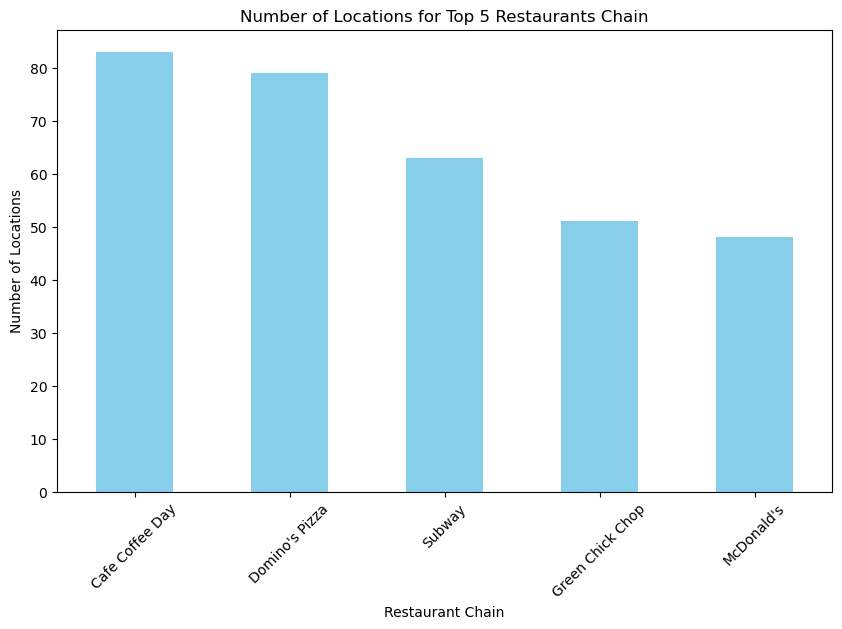

In [17]:
restaurant_chains = restaurant_counts[restaurant_counts > 47]

# Create a bar plot
plt.figure(figsize=(10, 6))
restaurant_chains.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Number of Locations for Top 5 Restaurants Chain')
plt.xlabel('Restaurant Chain')
plt.ylabel('Number of Locations')
plt.xticks(rotation=45)

# Show the plot
plt.show()

**Q.2) Analyze the ratings and popularity of
different restaurant chains.**

In [19]:
# Calculate the average rating for each restaurant name
average_ratings = df.groupby('Restaurant Name')['Aggregate rating'].mean().reset_index(name='Average Rating')

# Sort the restaurants by their average rating in descending order
sorted_average_ratings = average_ratings.sort_values(by='Average Rating', ascending=False)

# Display the sorted DataFrame
print(sorted_average_ratings)

                      Restaurant Name  Average Rating
5322   Restaurant Mosaic @ The Orient             4.9
4177                 Ministry of Crab             4.9
4135                            Miann             4.9
5757          Shorts Burger and Shine             4.9
4165                            Milse             4.9
...                               ...             ...
1105                      Cafe Corner             0.0
4905                  Pheva Tandooris             0.0
4913                     Pick & Carry             0.0
1096                     Cafe Brownie             0.0
2292  Famous Parantha and Poori Sabzi             0.0

[7446 rows x 2 columns]


In [21]:
# Calculate the total votes for each restaurant name
votes = df.groupby('Restaurant Name')['Votes'].sum().reset_index(name='Total Votes')

# Sort the restaurants by their total votes in descending order
sorted_votes = votes.sort_values(by='Total Votes', ascending=False)

# Display the sorted DataFrame
print(sorted_votes)

                Restaurant Name  Total Votes
663             Barbeque Nation        28142
101   AB's - Absolute Barbecues        13400
6943                       Toit        10934
785                   Big Chill        10853
2297                 Farzi Cafe        10098
...                         ...          ...
4375                  Muncheezz            0
6217            Swiss Gourmessa            0
2110      Dosa and Pizza Corner            0
6215            Sweets n Treats            0
2433               Food Station            0

[7446 rows x 2 columns]


In [12]:
restaurant_chains2 = restaurant_counts[restaurant_counts >1]

# Filter the DataFrame to include only chains
chain_df = df[df['Restaurant Name'].isin(restaurant_chains2)]

# Calculate average rating for each chain
avg_ratings = chain_df.groupby('Restaurant Name')['Aggregate rating'].mean()

C:\Users\raj\AppData\Local\Temp\ipykernel_1744\354024766.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='Restaurant Name', order=top_5_restaurant_names, palette='viridis')


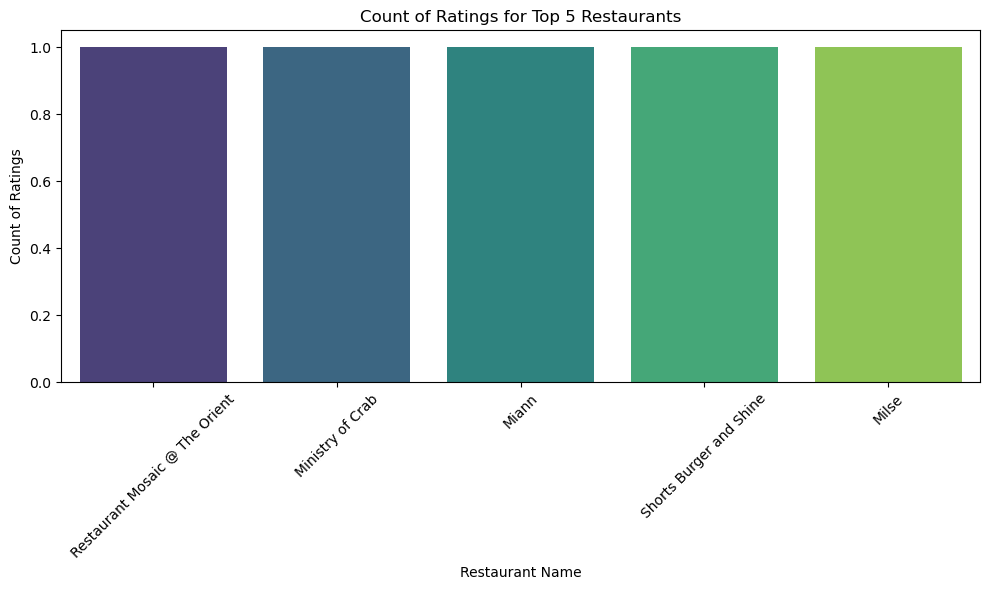

In [24]:
average_ratings = df.groupby('Restaurant Name')['Aggregate rating'].mean().reset_index(name='Average Rating')
top_5_restaurants = average_ratings.sort_values(by='Average Rating', ascending=False).head(5)

top_5_restaurant_names = top_5_restaurants['Restaurant Name']
filtered_df = df[df['Restaurant Name'].isin(top_5_restaurant_names)]

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='Restaurant Name', order=top_5_restaurant_names, palette='viridis')
plt.title('Count of Ratings for Top 5 Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Count of Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()